## Test ML models
### h2o.ai
Transform netCDF serialized files to h2o dataframes via xarray and pandas.

In [1]:
# Load data
from eo_stack import *
from regionstack import *
#from eotemparray import *

saldana = regionStack('Saldana_training_2015')
saldana.regionTrainingClasses()

S1 object initialized from /mnt/workspace_cluster_6/TRANSVERSAL_PROJECTS/MADR/COMPONENTE_2/Imagenes_Satelitales/Temp/asalazar_tests/data/Saldana_training_2015/pre/
Creation of new S1 stacks failed, reading existing stacks
Reading 4 S1 stack files
S1 object initialized from /mnt/workspace_cluster_6/TRANSVERSAL_PROJECTS/MADR/COMPONENTE_2/Imagenes_Satelitales/Temp/asalazar_tests/data/Saldana_training_2015/pre/
Creation of new S1 stacks failed, reading existing stacks
Reading 3 S1 stack files
S2 object initialized from /mnt/workspace_cluster_6/TRANSVERSAL_PROJECTS/MADR/COMPONENTE_2/Imagenes_Satelitales/Temp/asalazar_tests/data/Saldana_training_2015/pre/
Reading 3 S2 stack files
LE07 object initialized from /mnt/workspace_cluster_6/TRANSVERSAL_PROJECTS/MADR/COMPONENTE_2/Imagenes_Satelitales/Temp/asalazar_tests/data/Saldana_training_2015/pre/
Reading 4 LE07 stack files
LC08 object initialized from /mnt/workspace_cluster_6/TRANSVERSAL_PROJECTS/MADR/COMPONENTE_2/Imagenes_Satelitales/Temp/asala

In [2]:
import h2o
import xarray as xr
import pandas as pd

In [4]:
# Initialize h2o cluster
h2o.init(nthreads = -1, max_mem_size = 16)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-linux64) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-linux64) (build 25.121-b15, mixed mode)
  Starting server from /home/azalazar/anaconda2/envs/models/h2o_jar/h2o.jar
  Ice root: /tmp/tmpZmRPPQ
  JVM stdout: /tmp/tmpZmRPPQ/h2o_azalazar_started_from_python.out
  JVM stderr: /tmp/tmpZmRPPQ/h2o_azalazar_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,07 secs
H2O cluster timezone:,America/Bogota
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,2 months and 19 days
H2O cluster name:,H2O_from_python_azalazar_lbh88d
H2O cluster total nodes:,1
H2O cluster free memory:,14.22 Gb
H2O cluster total cores:,24
H2O cluster allowed cores:,24
H2O cluster status:,"accepting new members, healthy"


In [5]:
# Inspect input data
sat_data_again = saldana.s2
sat_data_again

<xarray.Dataset>
Dimensions:     (time: 5, x: 2979, y: 3631)
Coordinates:
  * x           (x) float64 4.889e+05 4.889e+05 4.889e+05 4.889e+05 ...
  * y           (y) float64 4.485e+05 4.484e+05 4.484e+05 4.484e+05 ...
  * time        (time) datetime64[ns] 2015-12-11 2015-12-21 2015-12-31 ...
    mask        (time, x, y) bool dask.array<shape=(5, 2979, 3631), chunksize=(1, 2979, 3631)>
    class_mask  (time, x, y) bool dask.array<shape=(5, 2979, 3631), chunksize=(1, 2979, 3631)>
Data variables:
    blue        (time, x, y) uint16 dask.array<shape=(5, 2979, 3631), chunksize=(1, 2979, 3631)>
    swir1       (time, x, y) uint16 dask.array<shape=(5, 2979, 3631), chunksize=(1, 2979, 3631)>
    swir2       (time, x, y) uint16 dask.array<shape=(5, 2979, 3631), chunksize=(1, 2979, 3631)>
    green       (time, x, y) uint16 dask.array<shape=(5, 2979, 3631), chunksize=(1, 2979, 3631)>
    nir         (time, x, y) uint16 dask.array<shape=(5, 2979, 3631), chunksize=(1, 2979, 3631)>
    NDVI        

In [9]:
# Select only data from a date and transform to pandas dataframe
data_pd = sat_data_again.sel(time='2015-12-11').drop('time').to_dataframe()
# Leave only data with class
data_pd_v1 = data_pd.loc[data_pd['class'] > 0]
# Remove not valid data (cloudy pixels)
data_pd_v2 = data_pd_v1.loc[data_pd_v1['mask'] == True]

In [10]:
# Inspect dataframe
data_pd_v2

blue  swir1  swir2  green   nir      NDVI      LSWI  red  \
x        y                                                                    
499455.0 425215.0   267   1283    671    469  2048  0.704536  0.229661  355   
         425205.0   258   1283    671    453  2162  0.717918  0.255152  355   
         425195.0   274   1424    794    496  2196  0.709615  0.213260  373   
499465.0 425245.0   292   1367    805    501  2083  0.681194  0.207536  395   
         425235.0   300   1394    813    511  2204  0.711845  0.225125  371   
         425225.0   283   1394    813    520  2203  0.690714  0.224910  403   
         425215.0   279   1396    793    504  2286  0.722034  0.241716  369   
         425205.0   273   1396    793    511  2326  0.722325  0.249866  375   
         425195.0   283   1407    799    499  2293  0.706736  0.239459  394   
         425185.0   302   1407    799    502  2357  0.712936  0.252391  395   
499475.0 425265.0   279   1403    776    478  2327  0.748967  0.247721  334   
         425255.0   280   1367    805    511  2287  0.720843  0.251779  371   
         425245.0   321   1367    805    527  2285  0.705860  0.251369  394   
         425235.0   309   1394    813    541  2286  0.690203  0.242391  419   
         425225.0   315   1394    813    526  2266  0.689784  0.238251  416   
         425215.0   280   1396    793    520  2269  0.723509  0.238199  364   
         425205.0   280   1396    793    511  2311  0.724627  0.246830  369   
         425195.0   261   1407    799    501  2303  0.720583  0.241509  374   
         425185.0   262   1407    799    516  2317  0.720758  0.244361  376   
499485.0 425285.0   268   1312    710    454  2523  0.773015  0.315776  323   
         425275.0   282   1344    740    467  2354  0.752140  0.273121  333   
         425265.0   268   1344    740    484  2322  0.746521  0.266776  337   
         425255.0   264   1451    832    501  2330  0.719557  0.232478  380   
         425245.0   300   1451    832    524  2355  0.705286  0.237520  407   
         425235.0   294   1533    865    530  2392  0.701280  0.218854  420   
         425225.0   317   1533    865    524  2355  0.716472  0.211420  389   
         425215.0   286   1479    835    520  2291  0.714179  0.215385  382   
         425205.0   280   1479    835    510  2355  0.719606  0.228482  384   
         425195.0   276   1437    788    484  2428  0.732430  0.256404  375   
         425185.0   270   1437    788    506  2408  0.732997  0.252536  371   
...                 ...    ...    ...    ...   ...       ...       ...  ...   
513275.0 434565.0   531   1850   1125    802  1596  0.312500 -0.073709  836   
         434555.0   543   1740   1010    798  1598  0.312526 -0.042540  837   
         434545.0   547   1740   1010    815  1585  0.314807 -0.046617  826   
513285.0 434625.0   513   1790    978    799  1564  0.315391 -0.067382  814   
         434615.0   513   1819   1023    782  1568  0.315988 -0.074107  815   
         434605.0   534   1819   1023    795  1582  0.311774 -0.069685  830   
         434595.0   541   1923   1161    794  1584  0.309091 -0.096664  836   
         434585.0   529   1923   1161    781  1594  0.323371 -0.093546  815   
         434575.0   517   1941   1178    795  1595  0.309524 -0.097851  841   
         434565.0   520   1941   1178    801  1604  0.302477 -0.095063  859   
         434555.0   549   1855   1124    812  1622  0.303859 -0.067012  866   
         434545.0   537   1855   1124    813  1571  0.303734 -0.082896  839   
513295.0 434605.0   504   1819   1023    804  1564  0.320388 -0.075377  805   
         434595.0   504   1923   1161    814  1578  0.306291 -0.098543  838   
         434585.0   531   1923   1161    804  1605  0.312347 -0.090136  841   
         434575.0   537   1941   1178    809  1618  0.303787 -0.090756  864   
         434565.0   544   1941   1178    813  1607  0.288693 -0.094138  887   
         434555.0   550   1855   1124    846  1612  0.285999 -0.07008

In [11]:
# Remove multi-index, as it is not preserved in h20
data_pd_v2.reset_index(inplace=True)

In [12]:
# Load data to h2o frame
data = h2o.H2OFrame(data_pd_v2)  # 3764 rows x 14 columns
data.shape

Parse progress: |█████████████████████████████████████████████████████████| 100%


(14805, 13)

In [13]:
data['class'] = data['class'].asfactor()  #encode the class response as a factor
data['class'].levels()  #after encoding, this shows the 5 factor levels, in this dataset '2' is missing!!!

[['1', '2', '3', '4', '5']]

In [14]:
# To train and test the model using only this data, split data
splits = data.split_frame(ratios=[0.7, 0.15], seed=1)
train = splits[0]
valid = splits[1]
test = splits[2]

In [15]:
# Show number of observations from each dataset
print train.nrow
print valid.nrow
print test.nrow

10416
2194
2195


In [20]:
# Define response variables and predictors
y = 'class'
x = list(data.columns)

In [23]:
# Show predictors
x

[u'blue', u'swir1', u'swir2', u'green', u'nir', u'NDVI', u'LSWI', u'red']

In [22]:
x.remove(y)  #remove the response
x.remove('x')
x.remove('y')
x.remove('mask')
x.remove('class_mask')
#x.remove('qa_cloud') #remove cloud mask

In [24]:
# test random forest
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [25]:
# Initialize model
rf_v1 = H2ORandomForestEstimator(
    model_id="rf_covType_v1",
    ntrees=200,
    stopping_rounds=2,
    score_each_iteration=True,
    seed=1000000)

In [26]:
# Train model
rf_v1.train(x, y, training_frame=train, validation_frame=valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [27]:
# Print model details
rf_v1

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_covType_v1


ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.0185147440009
RMSE: 0.136068894318
LogLoss: 0.248155309727
Mean Per-Class Error: 0.0158711588763
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,5,Error,Rate
1624.0,17.0,0.0,2.0,0.0,0.0115642,"19 / 1,643"
17.0,2483.0,13.0,7.0,0.0,0.0146825,"37 / 2,520"
0.0,21.0,3116.0,59.0,0.0,0.0250313,"80 / 3,196"
1.0,6.0,71.0,2700.0,0.0,0.0280778,"78 / 2,778"
0.0,0.0,0.0,0.0,253.0,0.0,0 / 253
1642.0,2527.0,3200.0,2768.0,253.0,0.0205967,"214 / 10,390"


Top-5 Hit Ratios: 


k,hit_ratio
1,0.9794033
2,0.9939365
3,0.9943215
4,0.9943215
5,1.0



ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.0173065562876
RMSE: 0.131554385285
LogLoss: 0.145745072533
Mean Per-Class Error: 0.0179711204478
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,5,Error,Rate
303.0,4.0,0.0,0.0,0.0,0.0130293,4 / 307
4.0,522.0,6.0,1.0,0.0,0.0206379,11 / 533
1.0,4.0,693.0,3.0,0.0,0.0114123,8 / 701
2.0,6.0,19.0,576.0,0.0,0.0447761,27 / 603
0.0,0.0,0.0,0.0,50.0,0.0,0 / 50
310.0,536.0,718.0,580.0,50.0,0.0227894,"50 / 2,194"


Top-5 Hit Ratios: 


k,hit_ratio
1,0.9772106
2,0.9954422
3,0.9972653
4,0.9972653
5,1.0


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2018-05-25 11:55:42,0.112 sec,0.0,nan,nan,nan,nan,nan,nan
,2018-05-25 11:55:43,0.699 sec,1.0,0.2068804,1.2501516,0.0432050,0.2020582,1.2427018,0.0446673
,2018-05-25 11:55:43,0.901 sec,2.0,0.2030344,1.1863168,0.0433665,0.1533008,0.4581514,0.0328168
,2018-05-25 11:55:43,1.029 sec,3.0,0.1925187,1.0032510,0.0396294,0.1392867,0.2609876,0.0255242
,2018-05-25 11:55:43,1.138 sec,4.0,0.1855294,0.8946803,0.0364648,0.1343581,0.1858522,0.0241568
,2018-05-25 11:55:44,1.255 sec,5.0,0.1774549,0.7730025,0.0334291,0.1352780,0.1736343,0.0264357
,2018-05-25 11:55:44,1.368 sec,6.0,0.1657641,0.6169585,0.0296666,0.1354310,0.1605909,0.0241568
,2018-05-25 11:55:44,1.490 sec,7.0,0.1589638,0.5263309,0.0271804,0.1355543,0.1471992,0.0237010
,2018-05-25 11:55:44,1.620 sec,8.0,0.1531156,0.4499150,0.0254121,0.1355379,0.1475452,0.0227894
,2018-05-25 11:55:44,1.730 sec,9.0,0.1481711,0.3937585,0.0242383,0.1339356,0.1459117,0.0227894


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
NDVI,13482.5810547,1.0,0.1765514
green,12154.0302734,0.9014617,0.1591543
red,11419.8876953,0.8470105,0.1495409
blue,10718.0283203,0.7949537,0.1403502
swir2,9294.8476562,0.6893968,0.1217140
swir1,6832.9711914,0.5067999,0.0894762
nir,6440.3427734,0.4776788,0.0843349
LSWI,6023.6264648,0.4467710,0.0788781


In [55]:
# Predict using test data
final_rf_predictions = rf_v1.predict(test[:-3])

drf prediction progress: |████████████████████████████████████████████████| 100%


In [64]:
test[:-3].nrow

2195

In [57]:
# Get test data accuracy
(final_rf_predictions['predict']==test['class']).as_data_frame(use_pandas=True).mean()

predict    0.978132
dtype: float64

In [31]:
# Shape of test data predictions
final_rf_predictions.as_data_frame().shape

(2195, 6)

In [32]:
final_rf_predictions['predict'].as_data_frame().shape

(2195, 1)

In [33]:
resulting_class_df = test.as_data_frame().join(final_rf_predictions['predict'].as_data_frame())

In [34]:
# Create MultiIndex from coordinates ## TODO include time!
resulting_class_df.set_index(['x', 'y'], inplace=True)

In [35]:
resulting_class_df.shape

(2195, 12)

In [36]:
# Test if duplicates (there shouldnt be!)
remove_duplicates = resulting_class_df[~resulting_class_df.index.duplicated(keep='first')]
remove_duplicates.shape

(2195, 12)

In [37]:
# Return to xarray
xarr = xr.Dataset.from_dataframe(resulting_class_df)

In [43]:
# Plot phenology class from test data. WHY IS IT LIKE THAT?!
xarr#['predict'].plot()

<xarray.Dataset>
Dimensions:     (x: 534, y: 552)
Coordinates:
  * x           (x) int64 499465 499485 499495 499505 499515 499525 499535 ...
  * y           (y) int64 424095 424105 424115 424125 424135 424145 424155 ...
Data variables:
    blue        (x, y) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    swir1       (x, y) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    swir2       (x, y) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    green       (x, y) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    nir         (x, y) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    NDVI        (x, y) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    LSWI        (x, y) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    red         (x, y) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    mask        (x, y) object nan nan nan nan nan nan nan nan nan nan nan ...
    class       (x, y) float64 nan nan nan nan nan na

In [44]:
# Prepare to compare initial with prediction
original = sat_data_again['class'].sel(time='2015-12-11').drop('time').drop('mask')
predicted = xarr['predict']

In [48]:
# Concatenate into one xarray
dimnames = xr.Variable('band', pd.Index(['class', 'predict']))
da = xr.concat([original.where(original>0).drop('class_mask'), predicted], dimnames)

In [49]:
da

<xarray.DataArray 'class' (band: 2, x: 2979, y: 3631)>
dask.array<shape=(2, 2979, 3631), dtype=float64, chunksize=(1, 2979, 3631)>
Coordinates:
  * y        (y) float64 4.122e+05 4.122e+05 4.122e+05 4.122e+05 4.122e+05 ...
  * x        (x) float64 4.889e+05 4.889e+05 4.889e+05 4.889e+05 4.889e+05 ...
  * band     (band) object 'class' 'predict'

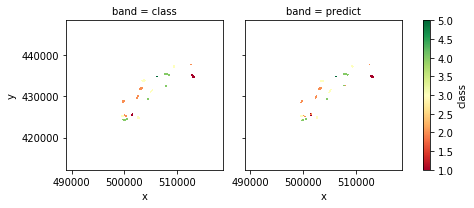

In [50]:
# Plot
da.plot(x='x', y='y', col='band', vmin=1., vmax=5., cmap='RdYlGn')

In [51]:
# Test merging into dataset
merged = xr.merge([original, predicted])
merged

<xarray.Dataset>
Dimensions:     (x: 2979, y: 3631)
Coordinates:
  * y           (y) float64 4.122e+05 4.122e+05 4.122e+05 4.122e+05 ...
  * x           (x) float64 4.889e+05 4.889e+05 4.889e+05 4.889e+05 ...
    class_mask  (x, y) bool dask.array<shape=(2979, 3631), chunksize=(2979, 3631)>
Data variables:
    class       (x, y) uint8 dask.array<shape=(2979, 3631), chunksize=(2979, 3631)>
    predict     (x, y) float64 nan nan nan nan nan nan nan nan nan nan nan ...

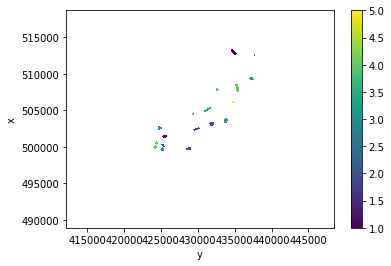

In [52]:
merged['class'].where(merged.class_mask).plot()

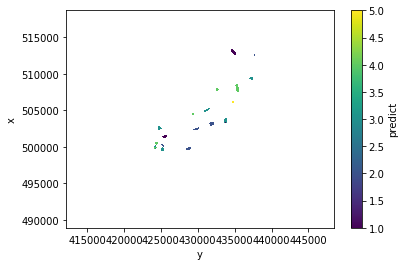

In [53]:
merged['predict'].plot()

In [83]:
# Close h2o cluster
h2o.cluster().shutdown(prompt=False)

## Rest of h2o.ai tutorial

In [25]:
# Import H2O RF:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [26]:
# Initialize the RF estimator:

rf_fit1 = H2ORandomForestEstimator(model_id='rf_fit1', seed=1)

In [27]:
rf_fit1.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [28]:
rf_fit2 = H2ORandomForestEstimator(model_id='rf_fit2', ntrees=100, seed=1)
rf_fit2.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [29]:
rf_perf1 = rf_fit1.model_performance(test)
rf_perf2 = rf_fit2.model_performance(test)

In [30]:
print rf_perf1.auc()
print rf_perf2.auc()

0.663462768485
0.669287987873


In [31]:
rf_fit3 = H2ORandomForestEstimator(model_id='rf_fit3', seed=1, nfolds=5)
rf_fit3.train(x=x, y=y, training_frame=data)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [32]:
print rf_fit3.auc(xval=True)

0.663606041745


In [33]:
# Import H2O GBM:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [34]:
# Initialize and train the GBM estimator:

gbm_fit1 = H2OGradientBoostingEstimator(model_id='gbm_fit1', seed=1)
gbm_fit1.train(x=x, y=y, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [35]:
gbm_fit2 = H2OGradientBoostingEstimator(model_id='gbm_fit2', ntrees=500, seed=1)
gbm_fit2.train(x=x, y=y, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [36]:
gbm_fit3 = H2OGradientBoostingEstimator(model_id='gbm_fit3', 
                                        ntrees=500, 
                                        score_tree_interval=5,     #used for early stopping
                                        stopping_rounds=3,         #used for early stopping
                                        stopping_metric='AUC',     #used for early stopping
                                        stopping_tolerance=0.0005, #used for early stopping
                                        seed=1)

# The use of a validation_frame is recommended with using early stopping
gbm_fit3.train(x=x, y=y, training_frame=train, validation_frame=valid)


gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [37]:
gbm_perf1 = gbm_fit1.model_performance(test)
gbm_perf2 = gbm_fit2.model_performance(test)
gbm_perf3 = gbm_fit3.model_performance(test)

In [38]:
# Retreive test set AUC
print gbm_perf1.auc()
print gbm_perf2.auc()
print gbm_perf3.auc()

0.683883128672
0.684086466361
0.684443511563


In [39]:
gbm_fit2.scoring_history()

Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2018-04-25 08:45:40,0.028 sec,0.0,0.3856346,0.4740298,0.5,1.0,0.8182546
,2018-04-25 08:45:40,0.128 sec,1.0,0.3837005,0.4691294,0.6577912,2.6832997,0.4006858
,2018-04-25 08:45:40,0.174 sec,2.0,0.3820620,0.4651166,0.6658294,2.7939915,0.3332492
,2018-04-25 08:45:40,0.221 sec,3.0,0.3806936,0.4618385,0.6685103,2.9710023,0.3447454
,2018-04-25 08:45:40,0.276 sec,4.0,0.3795380,0.4591170,0.6701132,2.9754401,0.3318046
---,---,---,---,---,---,---,---,---
,2018-04-25 08:45:43,3.795 sec,43.0,0.3677312,0.4317210,0.7124068,3.6410228,0.2975859
,2018-04-25 08:45:43,3.888 sec,44.0,0.3676187,0.4314625,0.7129225,3.6553764,0.3021722
,2018-04-25 08:45:44,3.989 sec,45.0,0.3674805,0.4311606,0.7134660,3.6649454,0.3023984
,2018-04-25 08:45:48,7.995 sec,226.0,0.3612902,0.4176954,0.7402357,4.2582264,0.2599471


In [40]:
# Import H2O DL:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [41]:
dl_fit1 = H2ODeepLearningEstimator(model_id='dl_fit1', seed=1)
dl_fit1.train(x=x, y=y, training_frame=train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [42]:
dl_fit2 = H2ODeepLearningEstimator(model_id='dl_fit2', 
                                   epochs=20, 
                                   hidden=[10,10], 
                                   stopping_rounds=0,  #disable early stopping
                                   seed=1)
dl_fit2.train(x=x, y=y, training_frame=train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [43]:
dl_fit3 = H2ODeepLearningEstimator(model_id='dl_fit3', 
                                   epochs=20, 
                                   hidden=[10,10],
                                   score_interval=1,          #used for early stopping
                                   stopping_rounds=3,         #used for early stopping
                                   stopping_metric='AUC',     #used for early stopping
                                   stopping_tolerance=0.0005, #used for early stopping
                                   seed=1)
dl_fit3.train(x=x, y=y, training_frame=train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [44]:
dl_perf1 = dl_fit1.model_performance(test)
dl_perf2 = dl_fit2.model_performance(test)
dl_perf3 = dl_fit3.model_performance(test)

In [45]:
# Retreive test set AUC
print dl_perf1.auc()
print dl_perf2.auc()
print dl_perf3.auc()

0.686254936726
0.681516110354
0.681802966019


In [47]:
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator
nb_fit1 = H2ONaiveBayesEstimator(model_id='nb_fit1')
nb_fit1.train(x=x, y=y, training_frame=train)

naivebayes Model Build progress: |████████████████████████████████████████| 100%


In [48]:
nb_fit2 = H2ONaiveBayesEstimator(model_id='nb_fit2', laplace=6)
nb_fit2.train(x=x, y=y, training_frame=train)

naivebayes Model Build progress: |████████████████████████████████████████| 100%


In [49]:
nb_perf1 = nb_fit1.model_performance(test)
nb_perf2 = nb_fit2.model_performance(test)

In [50]:
# Retreive test set AUC
print nb_perf1.auc()
print nb_perf2.auc()

0.651337099516
0.651391851824
